### Load Library & Dataset

In [3]:
# library
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# load dataset
car_data = pd.read_csv('data.csv', usecols=['horsepower', 'price'])

# display data
car_data.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [4]:
# show shape of the data
car_data.shape

(200, 2)

In [6]:
# show data informations
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   horsepower  200 non-null    float64
 1   price       200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [7]:
# show statistical description of the data
car_data.describe()

,horsepower,price
count,200.000000,200.000000
mean,103.320000,13230.375000
std,37.468615,7960.155239
min,48.000000,5118.000000
25%,70.000000,7775.000000
50%,95.000000,10320.000000
75%,116.000000,16500.750000
max,262.000000,45400.000000


In [8]:
# find if the data has missing value
car_data.isnull().sum()

horsepower    0
price         0
dtype: int64

### Doing EDA (Exploratory Data Analysis)

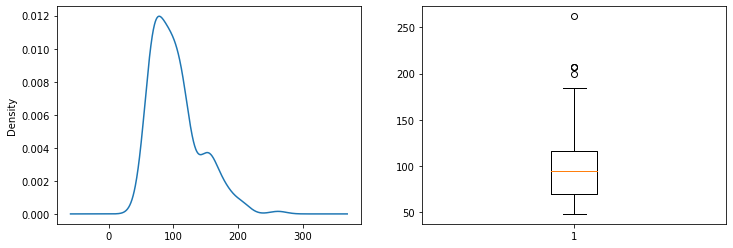

In [9]:
# show the distribution of horsepower
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
car_data['horsepower'].plot(kind='kde')

f.add_subplot(1, 2, 2)
plt.boxplot(car_data['horsepower'])
plt.show()

* From the graph above, we can see the mean and the median of horsepower centered 
around 100.
* There are uneven distribution of data (has high standard deviation) - indicated by long whiskers boxplot
* There are 3 outliers that we can see on the boxplot

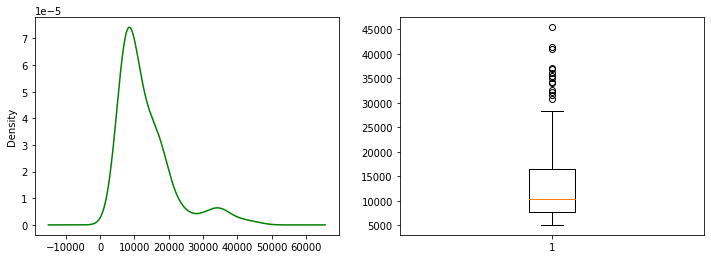

In [10]:
# show the distribution of price
f = plt.figure(figsize=(12, 4))

f.add_subplot(1, 2, 1)
car_data['price'].plot(kind='kde', c='g')

f.add_subplot(1, 2, 2)
plt.boxplot(car_data['price'])
plt.show()

* From the graph above, we can see the mean and the median of price centered 
around 10000.
* There are uneven distribution of data (has high standard deviation) - indicated by long whiskers boxplot (right skew)
* There are more outliers than horsepower that we can see on the boxplot

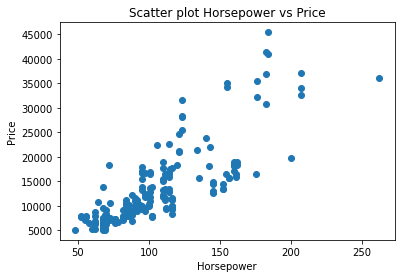

In [11]:
# bivariate analysis horsepower & price
# using scatter plot
plt.scatter(car_data['horsepower'], car_data['price'])
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter plot Horsepower vs Price')
plt.show()

* from the scatter plot above, we have significant positive correlation, which means if the horsepower high, the the price also getting high

In [13]:
# show correlations between horsepower and price
car_data.corr()

,horsepower,price
horsepower,1.000000,0.811097
price,0.811097,1.000000


### Modeling

In [14]:
# create x and y
x = car_data['horsepower'].values.reshape(-1,1)
y = car_data['price'].values.reshape(-1,1)

# split train data (80%) and testing data (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# create linear regression object
lin_reg = LinearRegression()

# train the model
lin_reg.fit(x_train, y_train)

# show coef (m) & intercept (b)
print(lin_reg.coef_)
print(lin_reg.intercept_)

[[161.2864947]]
[-3851.39763919]


* from coef (m) & intercept (b), the the formula is:
Y = 161.28x - 3976.39

In [16]:
# show accuracy model
lin_reg.score(x_test, y_test)

0.6632124163844706

Text(0.5, 1.0, 'Plot Horsepower vs Price')

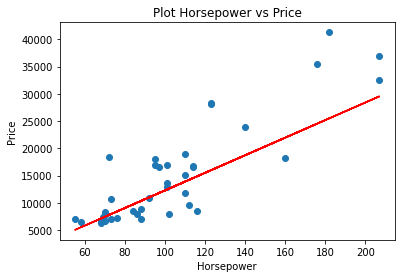

In [17]:
# visualize regression line using testing data
y_predictions = lin_reg.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predictions, c='r')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Plot Horsepower vs Price')

### Predict

In [18]:
# predict car price with horsepower 150
lin_reg.predict([[150]])

array([[20341.5765652]])

In [19]:
# predict car price with horsepower 200
lin_reg.predict([[200]])

array([[28405.90129999]])